# Regression assumptions

## Example 1

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Generate a synthetic dataset that satisfies the assumptions
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values using the test set
y_pred = model.predict(X_test)

In [5]:
# Residuals
residuals = y_test - y_pred

# Create a DataFrame for easier plotting
df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'residuals': residuals})

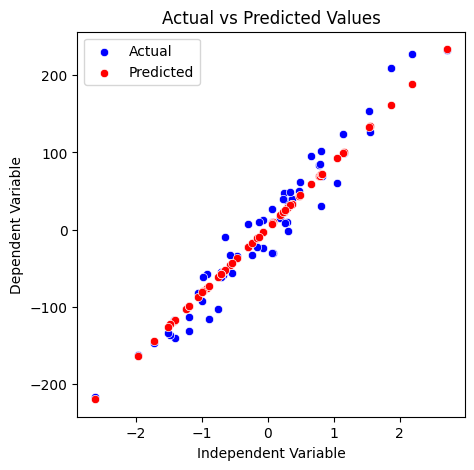

In [6]:
# Plotting data and regression
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual', color='blue')
sns.scatterplot(x=X_test.flatten(), y=y_pred, label='Predicted', color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

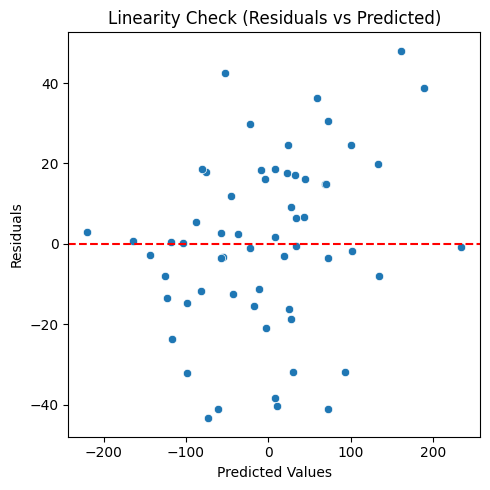

In [7]:
# Plot 1: Linearity
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residuals vs Predicted)')
plt.tight_layout()
plt.show()

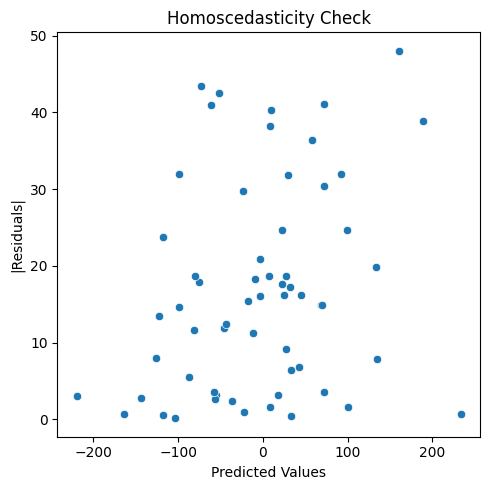

In [8]:
# Plot 2: Homoscedasticity
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel('Predicted Values')
plt.ylabel('|Residuals|')
plt.title('Homoscedasticity Check')
plt.tight_layout()
plt.show()

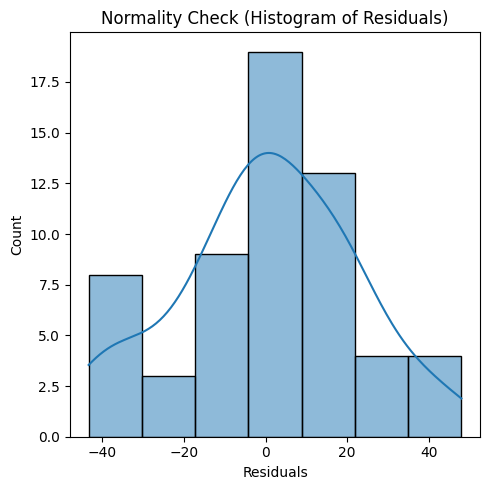

In [9]:
# Plot 3: Normality of Residuals
plt.figure(figsize=(5, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Normality Check (Histogram of Residuals)')
plt.tight_layout()
plt.show()

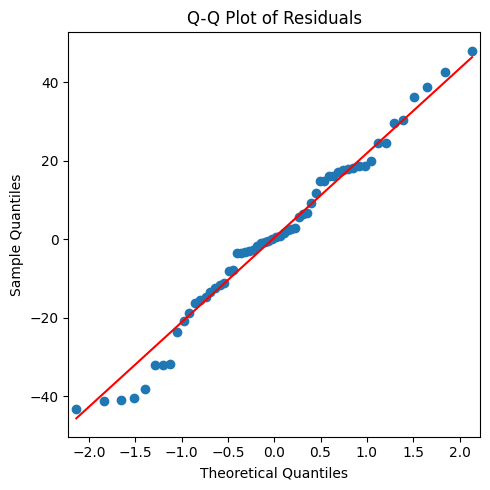

In [10]:
# Plot 4: Q-Q plot
plt.figure(figsize=(5, 5))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

## Example 2

In [11]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
# Generate a synthetic dataset that does not satisfy the assumptions
# Introduce non-linearity and heteroscedasticity
np.random.seed(42)
X_non_linear = np.random.uniform(-3, 3, 200).reshape(-1, 1)
y_non_linear = X_non_linear**3 + np.random.normal(0, 5 + X_non_linear.flatten()**2, 200)

# Split data into training and testing sets
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_non_linear, y_non_linear, test_size=0.3, random_state=42)

In [13]:
# Fit a Linear Regression model
model_nl = LinearRegression()
model_nl.fit(X_train_nl, y_train_nl)

# Predict the values using the test set
y_pred_nl = model_nl.predict(X_test_nl)

# Residuals
residuals_nl = y_test_nl - y_pred_nl

In [14]:
# Flatten the residuals and other variables to resolve the dimension issue
y_test_nl = y_test_nl.flatten()
y_pred_nl = y_pred_nl.flatten()
residuals_nl = residuals_nl.flatten()

In [15]:
# Create a DataFrame for easier plotting
df_nl = pd.DataFrame({'y_test': y_test_nl, 'y_pred': y_pred_nl, 'residuals': residuals_nl})

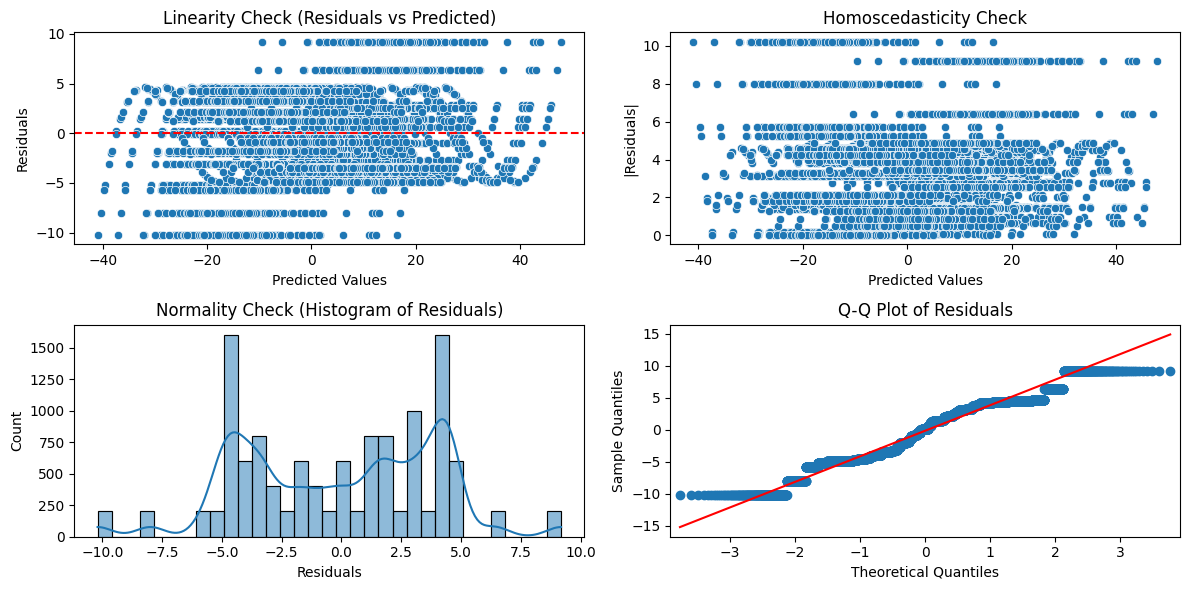

In [16]:
# Plot 1: Linearity
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred_nl, y=residuals_nl)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residuals vs Predicted)')

# Plot 2: Homoscedasticity
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_nl, y=np.abs(residuals_nl))
plt.xlabel('Predicted Values')
plt.ylabel('|Residuals|')
plt.title('Homoscedasticity Check')

# Plot 3: Normality of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals_nl, kde=True)
plt.xlabel('Residuals')
plt.title('Normality Check (Histogram of Residuals)')

# Plot 4: Q-Q plot
plt.subplot(2, 2, 4)
sm.qqplot(residuals_nl, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

Exercise 3: Wine Dataset

In [17]:
from sklearn.datasets import load_wine

data = load_wine()

df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target']).convert_dtypes()
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,0
2,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,0


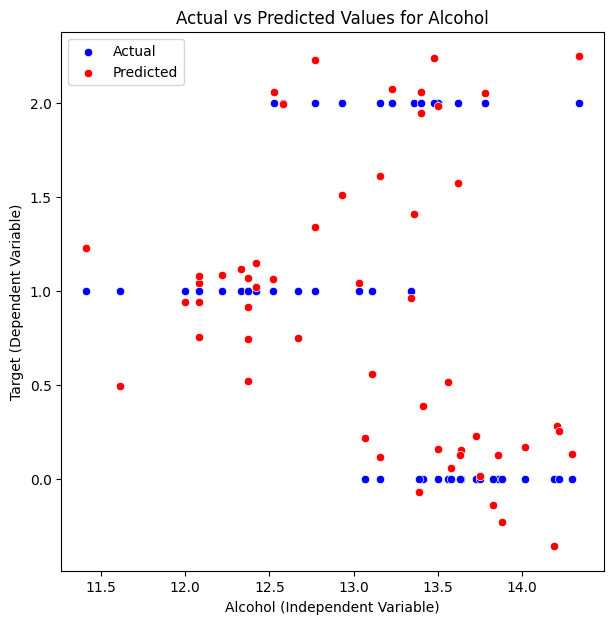

In [18]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values using the test set
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Plotting actual vs. predicted values for the chosen feature
plt.figure(figsize=(7, 7))
sns.scatterplot(x=X_test['alcohol'], y=y_test, label='Actual', color='blue')
sns.scatterplot(x=X_test['alcohol'], y=y_pred, label='Predicted', color='red')

plt.xlabel('Alcohol (Independent Variable)')
plt.ylabel('Target (Dependent Variable)')
plt.title('Actual vs Predicted Values for Alcohol')
plt.legend()
plt.show()

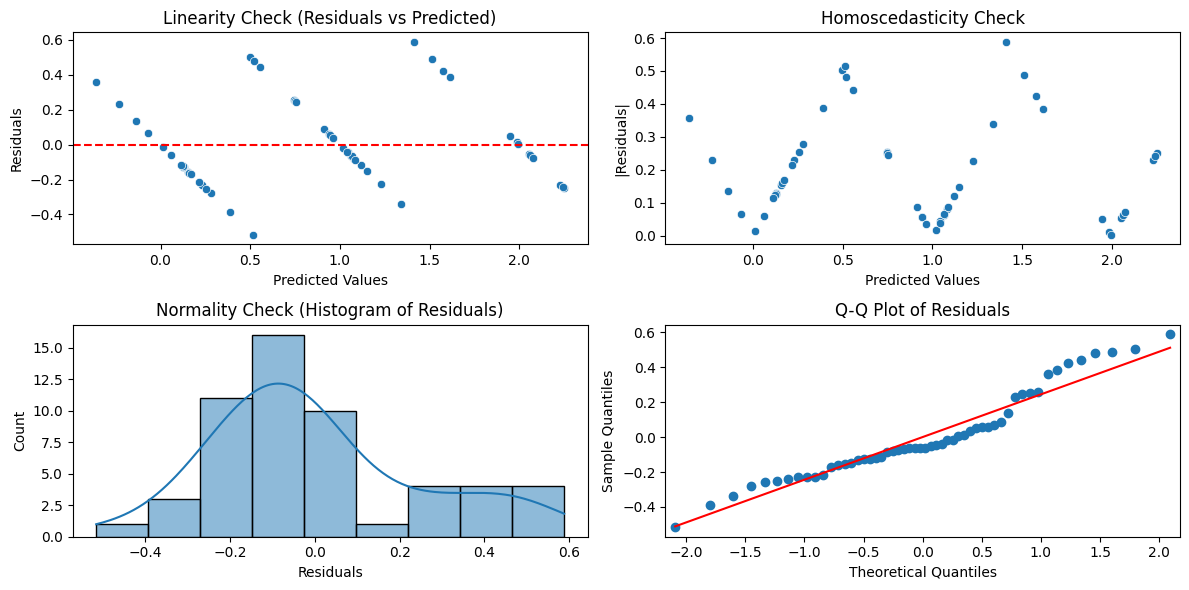

In [19]:
plt.figure(figsize=(12, 6))

# Plot 1: Linearity
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residuals vs Predicted)')

# Plot 2: Homoscedasticity
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel('Predicted Values')
plt.ylabel('|Residuals|')
plt.title('Homoscedasticity Check')

# Plot 3: Normality of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Normality Check (Histogram of Residuals)')

# Plot 4: Q-Q plot
plt.subplot(2, 2, 4)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

Exercise 4: Advertising Dataset

In [22]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
ads = pd.read_csv(next(iter(uploaded.keys())))
ads.head()

Saving advertising.csv to advertising (2).csv


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


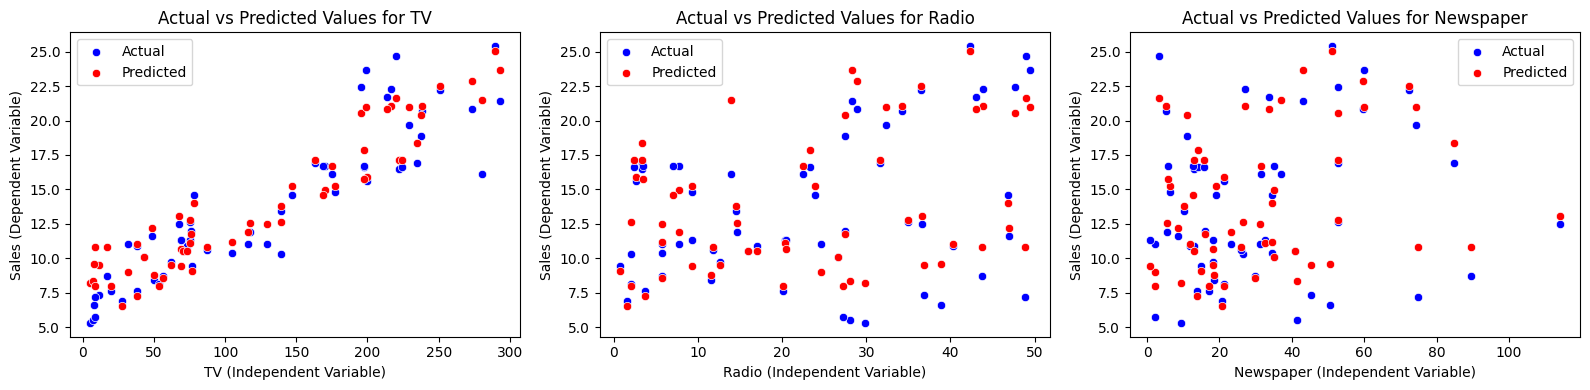

In [30]:
X = ads.drop(columns=['Sales'])
y = ads['Sales']

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Plot for 'TV'
sns.scatterplot(x=X_test['TV'], y=y_test, label='Actual', color='blue', ax=axes[0])
sns.scatterplot(x=X_test['TV'], y=y_pred, label='Predicted', color='red', ax=axes[0])
axes[0].set_xlabel('TV (Independent Variable)')
axes[0].set_ylabel('Sales (Dependent Variable)')
axes[0].set_title('Actual vs Predicted Values for TV')
axes[0].legend()

# Plot for 'Radio'
sns.scatterplot(x=X_test['Radio'], y=y_test, label='Actual', color='blue', ax=axes[1])
sns.scatterplot(x=X_test['Radio'], y=y_pred, label='Predicted', color='red', ax=axes[1])
axes[1].set_xlabel('Radio (Independent Variable)')
axes[1].set_ylabel('Sales (Dependent Variable)')
axes[1].set_title('Actual vs Predicted Values for Radio')
axes[1].legend()

# Plot for 'Newspaper'
sns.scatterplot(x=X_test['Newspaper'], y=y_test, label='Actual', color='blue', ax=axes[2])
sns.scatterplot(x=X_test['Newspaper'], y=y_pred, label='Predicted', color='red', ax=axes[2])
axes[2].set_xlabel('Newspaper (Independent Variable)')
axes[2].set_ylabel('Sales (Dependent Variable)')
axes[2].set_title('Actual vs Predicted Values for Newspaper')
axes[2].legend()

plt.tight_layout()
plt.show()

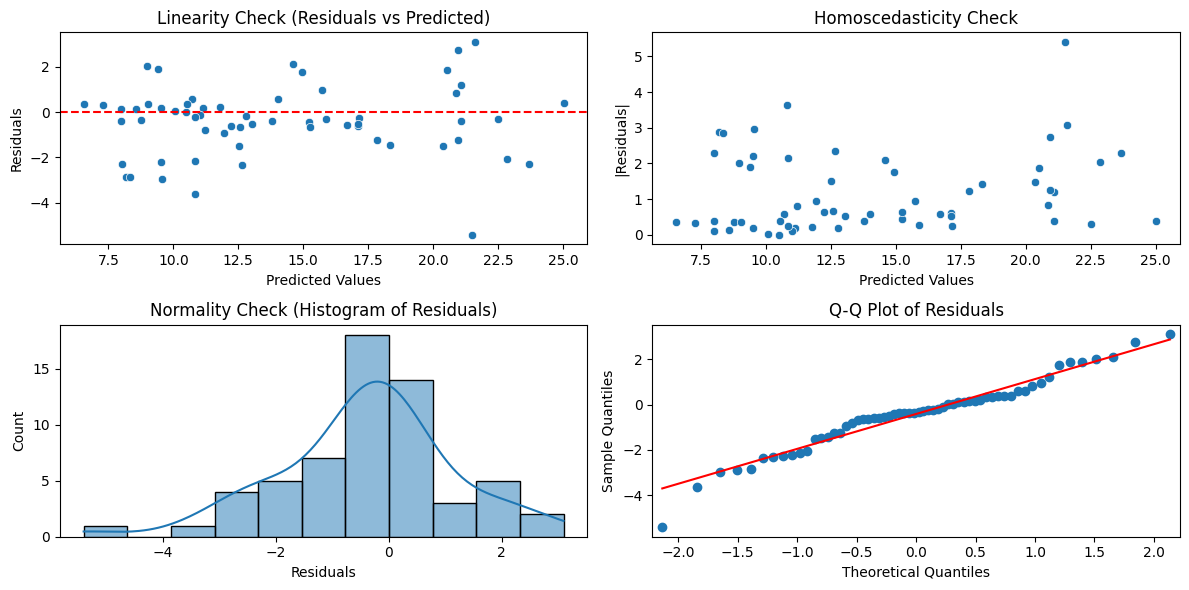

In [32]:
plt.figure(figsize=(12, 6))

# Plot 1: Linearity Check
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residuals vs Predicted)')

# Plot 2: Homoscedasticity Check
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel('Predicted Values')
plt.ylabel('|Residuals|')
plt.title('Homoscedasticity Check')

# Plot 3: Normality of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Normality Check (Histogram of Residuals)')

# Plot 4: Q-Q Plot
plt.subplot(2, 2, 4)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()